<a href="https://colab.research.google.com/github/AleRocco2022/Prueba/blob/main/Data_Wrangling_Rocco_Alejandro_Daniel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Proyecto Data Science Primera Entrega
---

# Introducción:



**Contexto empresarial**. La ciudad de Nueva York ha experimentado un 
aumento en el número de alquileres temporales en la ciudad. Desde la plataforma Airbnb, quieren saber si el número de alquileres ha aumentado en los últimos meses y para ello han recopilado y registrado información acerca de cada anfitrión durante los últimos cuatro años (desde 01 de julio de 2015 hasta el 30 el de junio de 2019).

La plataforma nos ha contratado para que construyamos visualizaciones que les ayuden a identificar patrones en los alquileres registrados, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de anulaciones de reservas en el futuro. Tienen ciertos parámetros como municipios, barrios, día que fue evaluado, tipos de lugar reservado, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial**. Nuestra tarea es transformar los datos proporcionados y generar visualizaciones que respondan las preguntas específicas que tiene el cliente, las que se mencionan a continuación.

**Contexto analítico**. Se le proporciona un archivo CSV (almacenado en la carpeta datos ya creada) que contiene detalles sobre cada alquiler / reserva, como fecha, tipo de lugar, municipio, barrio, nombres de los usuarios, etc. Realizará las siguientes tareas con los datos:
1. Extraiga datos adicionales del municipio almacenados en un archivo.
2. Leer, transformar y preparar datos para su visualización.
3. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.

El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:  

*   ¿ Cuáles son los distritos dentro de New York, más elegidos por los usuarios de la plataforma de Airbnb ?
*   ¿ Cúales son los barrios o vecindarios más elegido por los usuarios dentro de cada distrito?
*   ¿ Cuál es el precio promedio dentro de los distritos ? 
*   ¿ Hay diferencia significativa de precios entre los distintos tipos de hospedaje ofrecidos por la plataforma?
*   ¿ Qué tipo de hospedaje es el más reservado por los usuarios ?

Para comenzar importaremos las librerias necesarias para este desafio y luego importaremos el dataset seleccionado.


# Importación y carga de las librerías. Importación de Datasets. Overview de los datos.

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import folium


In [79]:
from google.colab import drive

In [80]:
import os

In [81]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [82]:
df= pd.read_csv('/content/gdrive/MyDrive/AB_NYC_2019.csv')

In [83]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647,-73.972,Private room,149,1,9,2018-10-19,0.210,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.754,-73.984,Entire home/apt,225,1,45,2019-05-21,0.380,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809,-73.942,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685,-73.960,Entire home/apt,89,1,270,2019-07-05,4.640,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.799,-73.944,Entire home/apt,80,10,9,2018-11-19,0.100,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.679,-73.950,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.702,-73.933,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.815,-73.949,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.758,-73.991,Shared room,55,1,0,NaN,NaN,6,2


En el siguiente Dataset, trataremos de indagar cual es el zona de New York donde la gente se ubica, las mejores zonas para visitar y cantidad de veces que se accede a los departamentos, casas, segun la epoca del año



Para no alterar el dataset original, hacemos una copia del mismo. El nuevo Dataset lo llamaremos df1

In [84]:
df1 = df


In [85]:
df1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647,-73.972,Private room,149,1,9,2018-10-19,0.210,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.754,-73.984,Entire home/apt,225,1,45,2019-05-21,0.380,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809,-73.942,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685,-73.960,Entire home/apt,89,1,270,2019-07-05,4.640,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.799,-73.944,Entire home/apt,80,10,9,2018-11-19,0.100,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.679,-73.950,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.702,-73.933,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.815,-73.949,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.758,-73.991,Shared room,55,1,0,NaN,NaN,6,2


Como podemos observar, el df1 cuenta con 16 columnas y 48895 filas

Para poder visualizar los datos del df1, debemos primeramente cambiar el formato de la columna `last_review`, pasarla al formato datetime.

In [86]:
df1['last_review'] = pd.to_datetime(df1['last_review'])

In [87]:
df1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647,-73.972,Private room,149,1,9,2018-10-19,0.210,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.754,-73.984,Entire home/apt,225,1,45,2019-05-21,0.380,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809,-73.942,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685,-73.960,Entire home/apt,89,1,270,2019-07-05,4.640,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.799,-73.944,Entire home/apt,80,10,9,2018-11-19,0.100,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.679,-73.950,Private room,70,2,0,NaT,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.702,-73.933,Private room,40,4,0,NaT,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.815,-73.949,Entire home/apt,115,10,0,NaT,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.758,-73.991,Shared room,55,1,0,NaT,NaN,6,2


In [88]:
df1.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647,-73.972,Private room,149,1,9,2018-10-19,0.210,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.754,-73.984,Entire home/apt,225,1,45,2019-05-21,0.380,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809,-73.942,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685,-73.960,Entire home/apt,89,1,270,2019-07-05,4.640,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.799,-73.944,Entire home/apt,80,10,9,2018-11-19,0.100,1,0


Analizemos a qué fecha esta la última información cargada en el data frame

In [89]:
# Encontrar el último día que fue valorado
ultimo_dia = df1['last_review'].max()

# Mostrar el último día valorado
print("El último día valorado en el DataFrame es:", ultimo_dia)

El último día valorado en el DataFrame es: 2019-07-08 00:00:00


Analizemos las columnas presentes en el data frame

In [90]:
df1.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

Tenemos las siguientes columnas:
 1. id: el identificador único del registro
 2. name: nombre del lugar a reservar o alquilar
 3. host_id: el identificador único del anfitrión
 4. host_name: nombre del anfitrión o dueño del lugar
 5. neighbourhood_group: municipio o cumuna
 6. neighbourhood: vecindario
 7. latitude: latitud
 8. longitude: longitud
 9. room_type: tipo de lugar
10. price: precio de la locación
11. minimum_nights: estadía mínima 
12. number_of_reviews: cantidad de veces que se evaluó el lugar 
13. last_review: última vez que fue evaluado, valorado
14. reviews_per_month: opiniones por mes
15. calculated_host_listings_count: recuento calculado de los listados de anfitrión
16. availability_365: disponibilidad anual



# ¿ Cuáles son los distritos dentro de New York, más elegidos por los usuarios de la plataforma de Airbnb ?

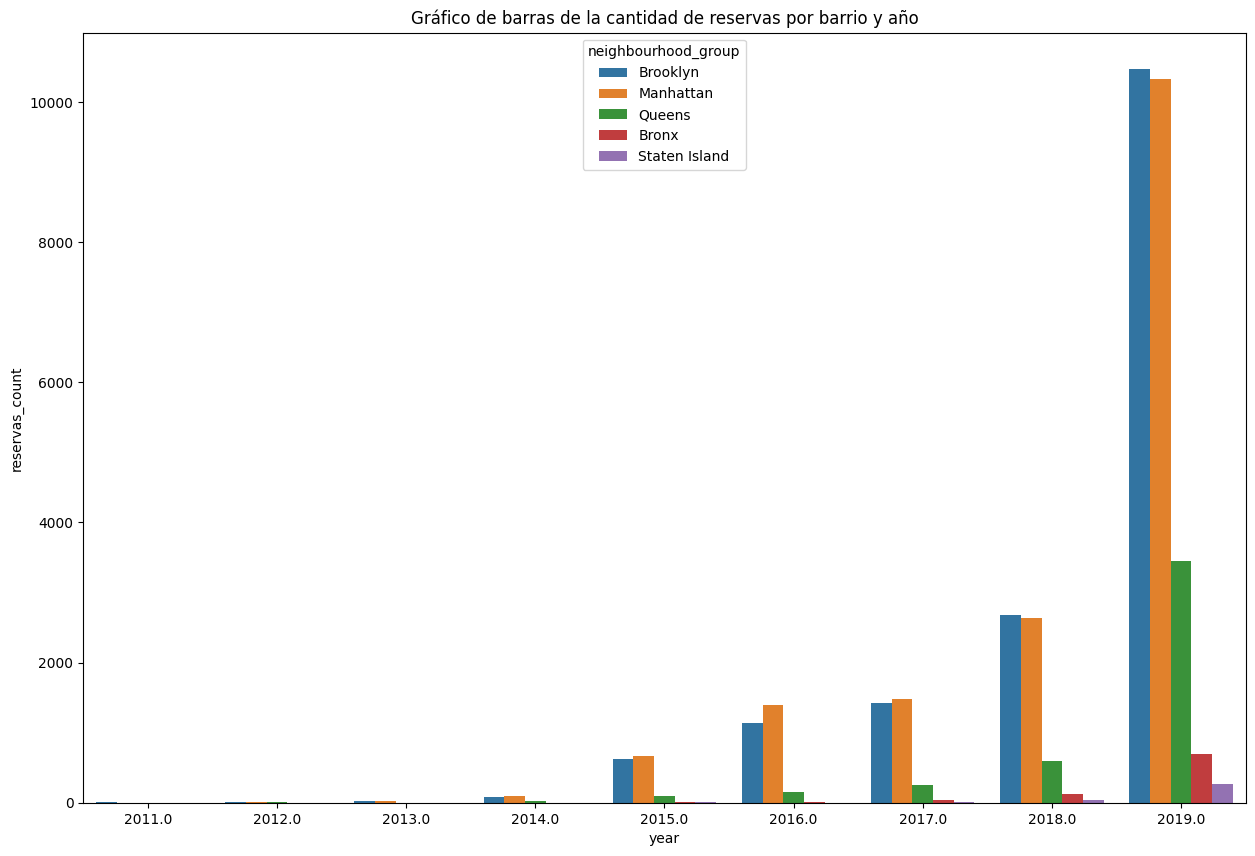

In [92]:
# Convertir la columna 'last_review' a formato datetime
df1['last_review'] = pd.to_datetime(df1['last_review'])

# Agregar una columna de fecha que contenga solo el año de 'last_review'
df1['year'] = df1['last_review'].dt.year

# Crear un nuevo DataFrame que agrupe por año, barrio, contando la cantidad de reservas en cada grupo
df_grouped = df1.groupby(['year', 'neighbourhood_group'])['id'].count().reset_index()
df_grouped.columns = ['year', 'neighbourhood_group', 'reservas_count']

# Graficar el gráfico de barras utilizando el método barplot de Seaborn
plt.figure(figsize=(15,10))
sns.barplot(x='year', y='reservas_count', data=df_grouped, hue='neighbourhood_group')
plt.title('Gráfico de barras de la cantidad de reservas por barrio y año')
plt.show()




De estos gráficos podemos apreciar que los distritos más elegidos por los usuarios dentro de New York, fueron Brooklyn, Manhattan y Queens, dentro de un período de tiempo de análisis que va desde el año 2015 al 2019.

# ¿ Cúales son los barrios o vecindarios más elegidos por los usuarios dentro de cada distrito?

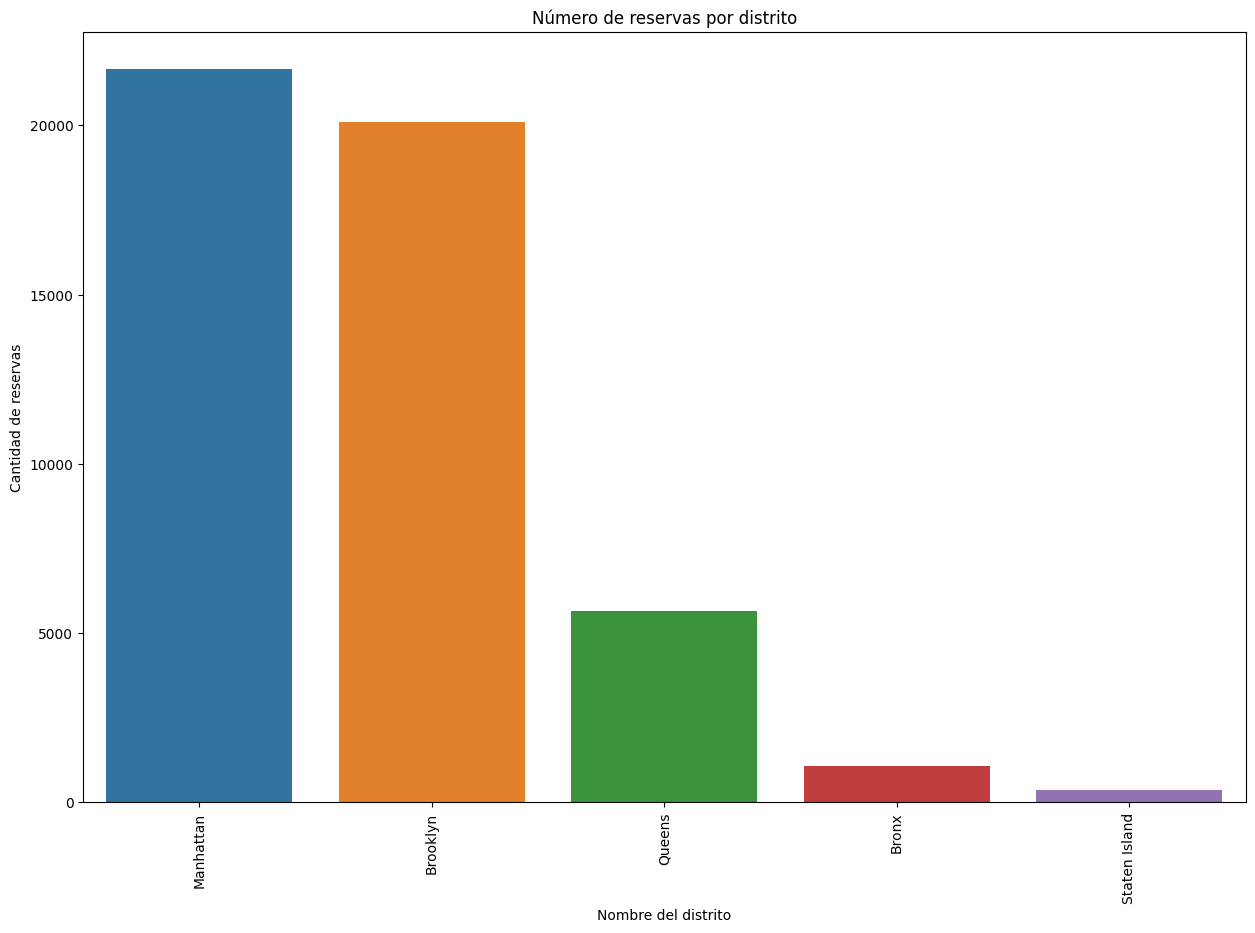

In [93]:
# Agrupa por el nombre del host y cuenta las reservas
df_neighbourhood = df1.groupby('neighbourhood_group').count()['neighbourhood'].reset_index()

# Ordena de mayor a menor
df_neighbourhood = df_neighbourhood.sort_values(by='neighbourhood', ascending=False)

# Grafica los resultados
plt.figure(figsize=(15,10))
sns.barplot(x='neighbourhood_group', y='neighbourhood', data=df_neighbourhood)
plt.title("Número de reservas por distrito")
plt.xlabel('Nombre del distrito')
plt.ylabel('Cantidad de reservas')
plt.xticks(rotation=90)
plt.show()

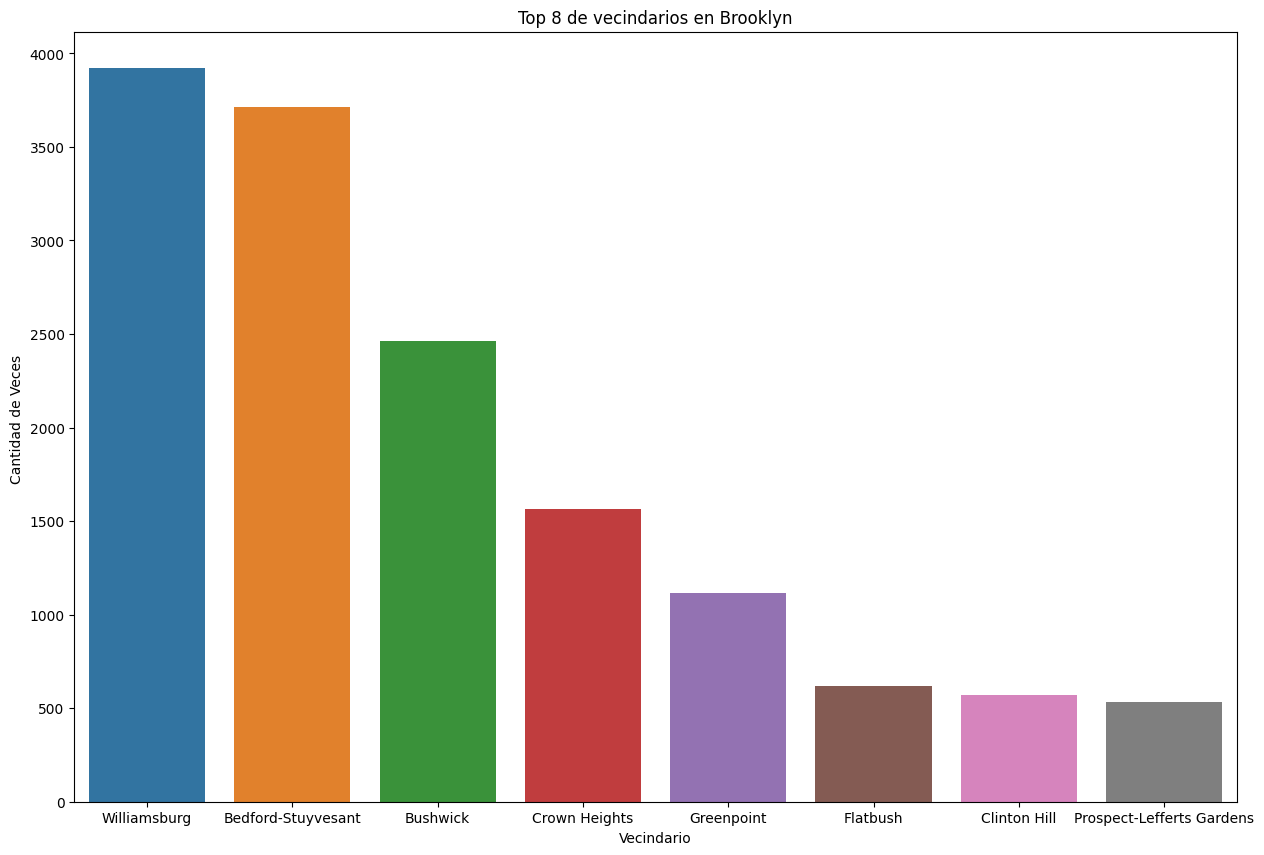

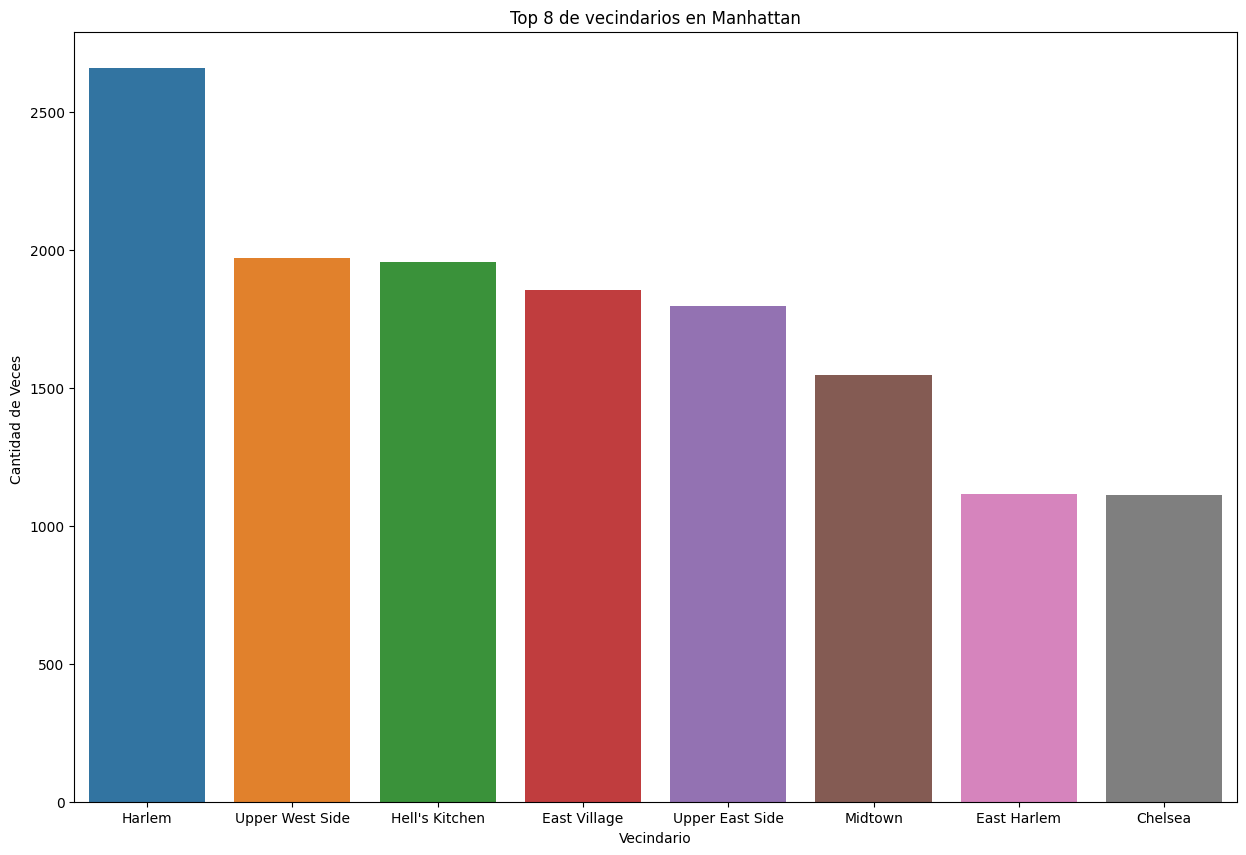

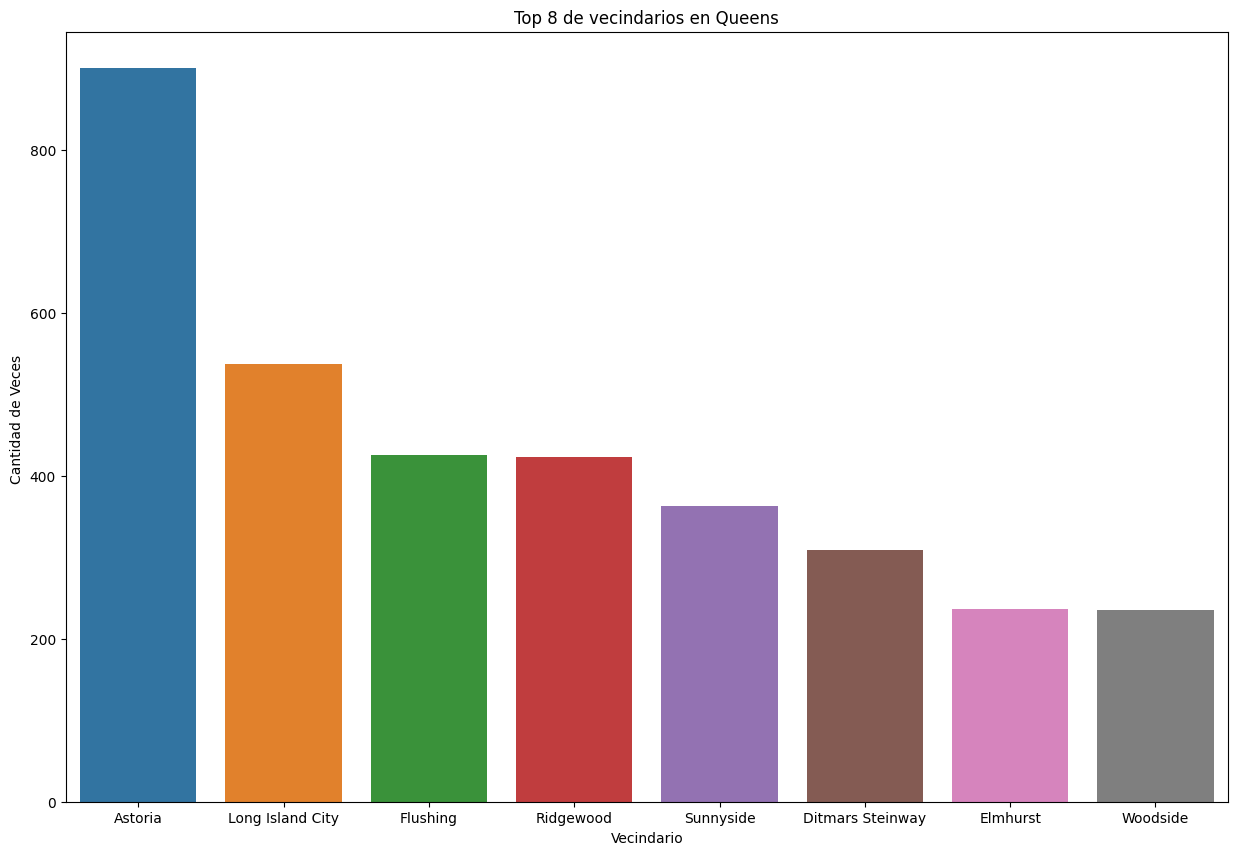

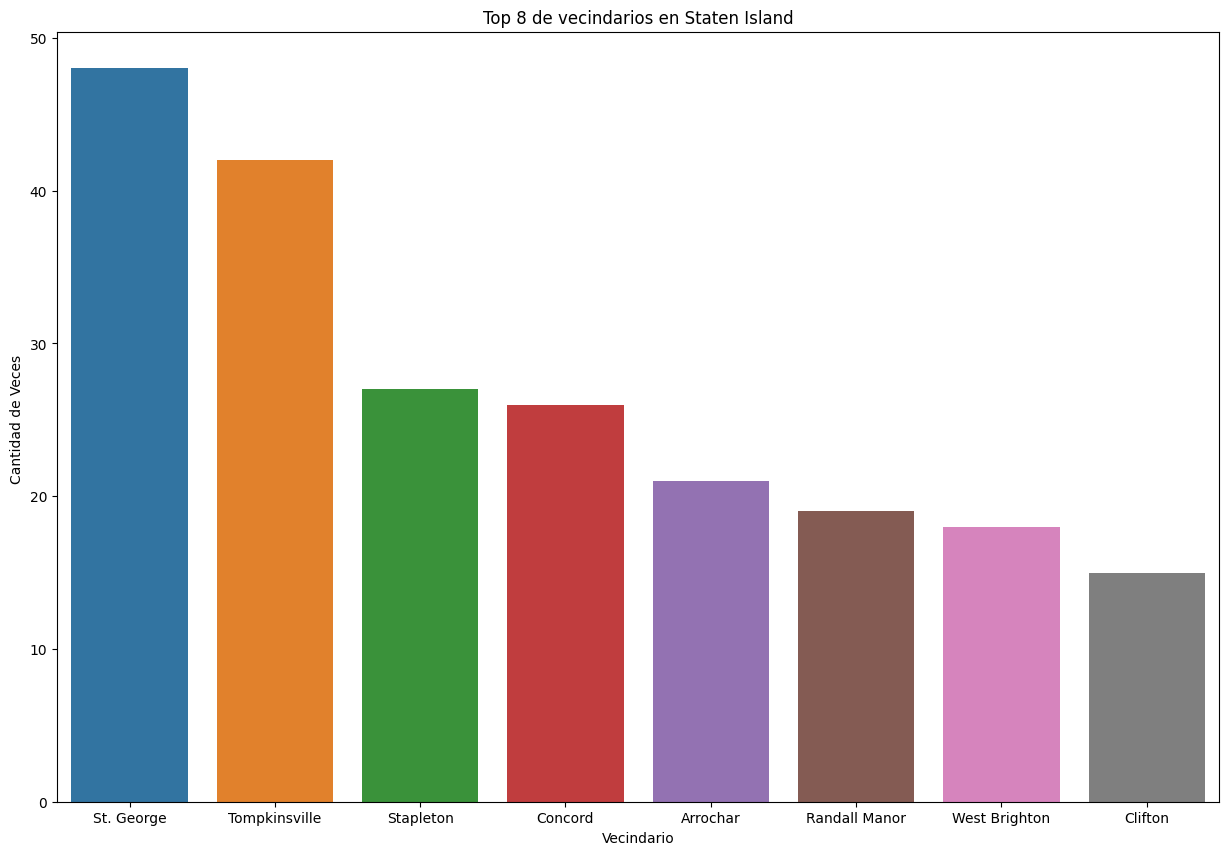

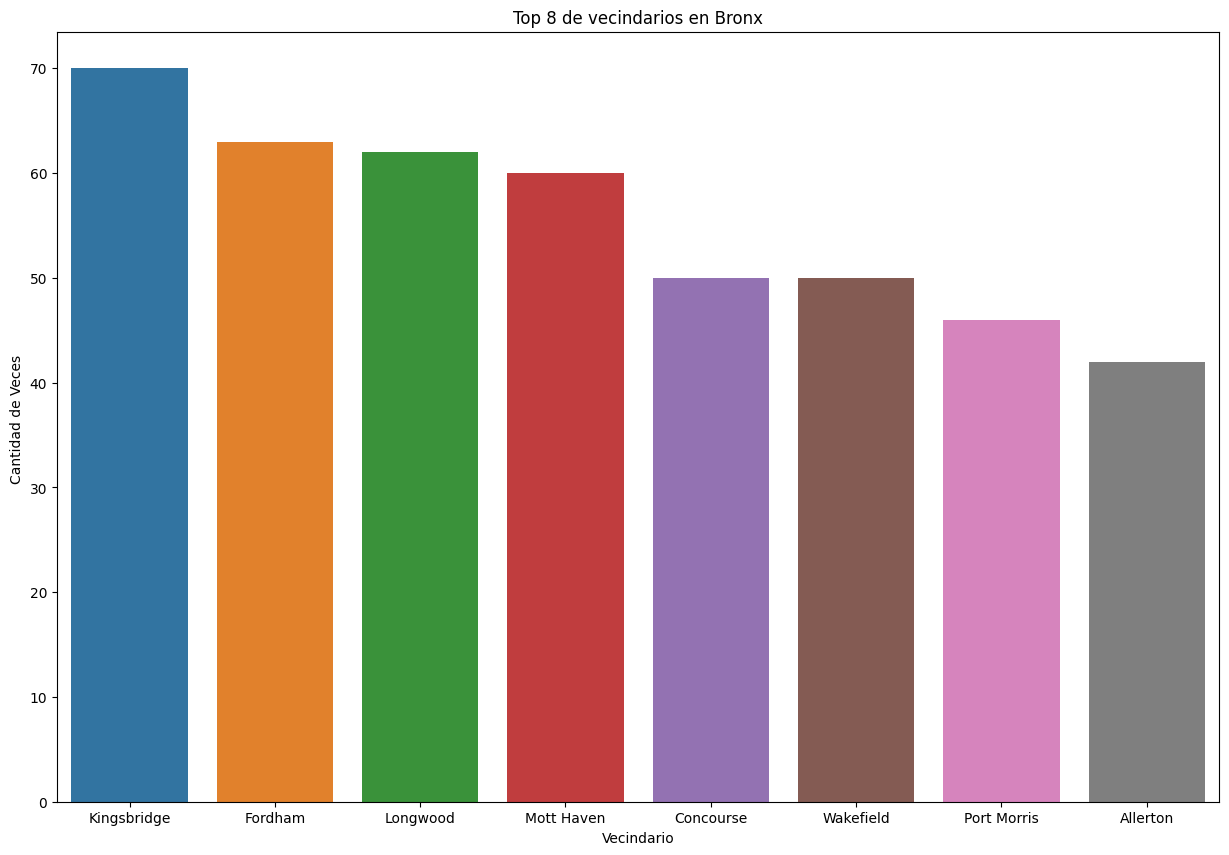

In [94]:
# Agrupar los datos por neighbourhood_group y neighbourhood y contar la cantidad de veces que cada barrio aparece en cada distrito
df_grouped = df.groupby(['neighbourhood_group', 'neighbourhood']).size().reset_index(name='count')

# Iterar sobre cada distrito y graficar los resultados para ese distrito
for district in df['neighbourhood_group'].unique():
    # Seleccionar los datos correspondientes al distrito actual y ordenarlos por conteo
    df_district = df_grouped[df_grouped['neighbourhood_group'] == district].sort_values(by='count', ascending=False)
    
    # Seleccionar los 8 barrios más populares del distrito actual
    top_neighbourhoods = df_district.iloc[:8]['neighbourhood']
    
    # Crear un gráfico de barras para los 8 barrios más populares del distrito actual
    fig, ax = plt.subplots(figsize=(15, 10))
    sns.barplot(x=top_neighbourhoods, y=df_district.iloc[:8]['count'])
    ax.set_xlabel('Vecindario')
    ax.set_ylabel('Cantidad de Veces ')
    ax.set_title(f"Top 8 de vecindarios en {district}")
    plt.show()



Como podemos apreciar en estos gráficos, aca podemos distinguir bien cual es el barrio más elegido por los usuarios, mostramos los 8 primeros de cada uno, dependiendo de los distritos que nos encontremos analizando.

# ¿ Cuál es el precio promedio dentro de los distritos ?

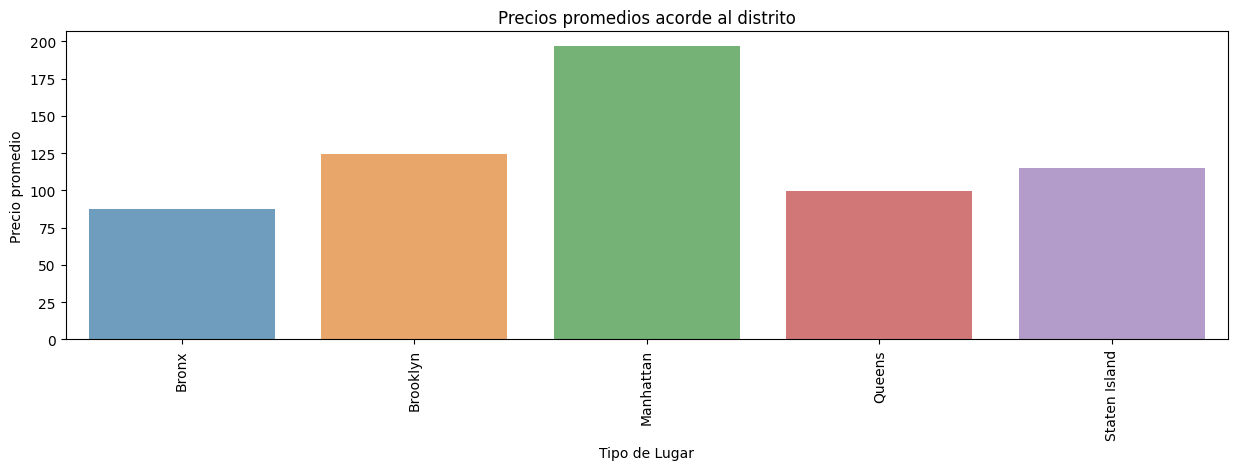

In [95]:
# Gráfica de los precios promedio por distrito

fig, ax = plt.subplots(figsize=(15,4))
Tipo_de_lugar = df1.groupby('neighbourhood_group')['price'].mean()
sns.barplot(x=Tipo_de_lugar.index, y=Tipo_de_lugar.values, alpha=0.7)
ax.set_title("Precios promedios acorde al distrito")
ax.set_ylabel("Precio promedio")
ax.set_xlabel("Tipo de Lugar")
plt.xticks(rotation=90)
plt.show()

De este gráfico podemos observar que el precio promedio por cada distrito es diferente siendo más costoso Manhattan y menos costoso el distrito del Bronx.

# ¿ Hay diferencia significativa de precios entre los distintos tipos de hospedaje ofrecidos por la plataforma?

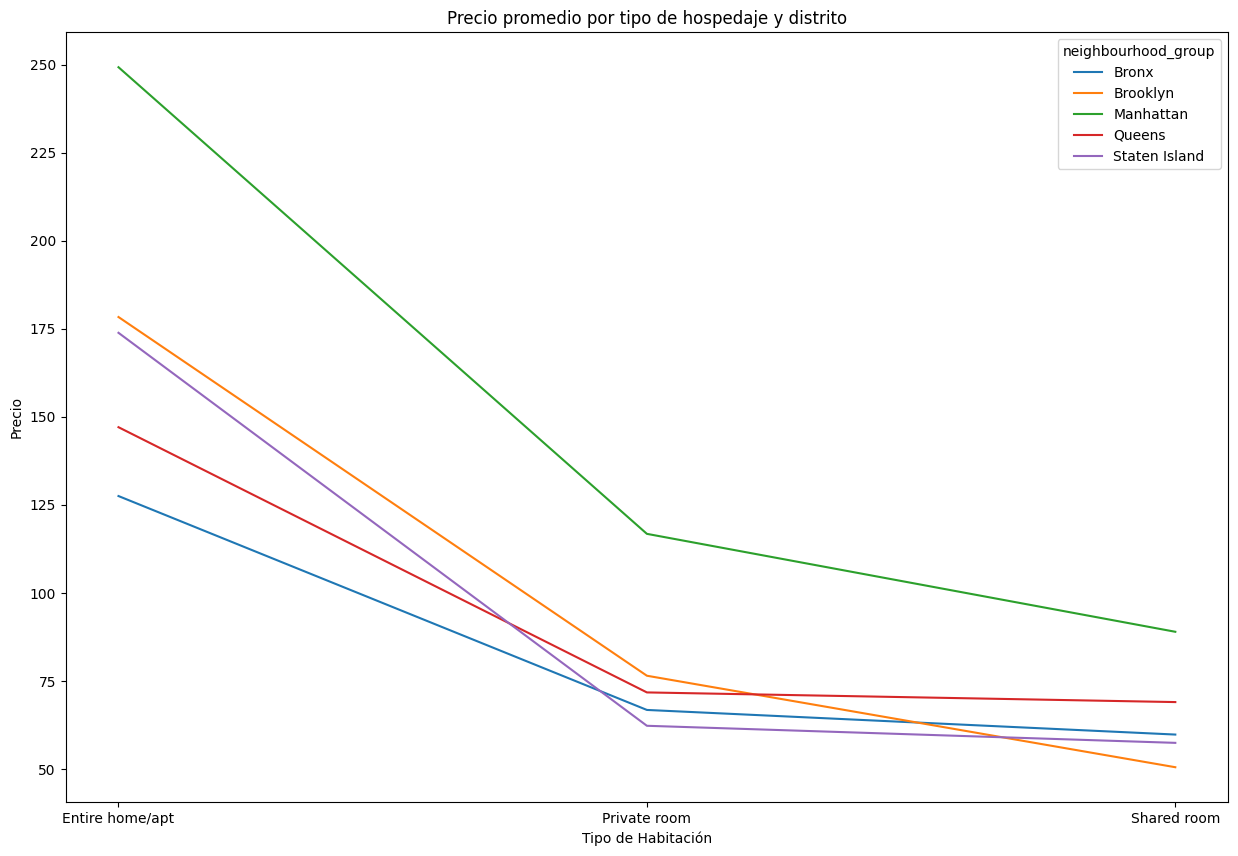

In [96]:
plt.figure(figsize=(15,10))

# Agrupar los datos por tipo de habitación y grupo de vecinos, y calcular la media de cada grupo
type1mean = df1.groupby(['room_type', 'neighbourhood_group']).price.mean().reset_index()

plt.title("Precio promedio por tipo de hospedaje y distrito")

# Crear un gráfico de líneas del precio medio para cada tipo de habitación y grupo de vecinos
g = sns.lineplot(x='room_type', y='price', hue='neighbourhood_group', data=type1mean)
g.set_xlabel('Tipo de Habitación')
g.set_ylabel('Precio')
plt.show()

De este gráfico podemos ver que efectivamente hay diferencias en los precios promedios dependiendo el tipo de hospedaje y el distrito donde se quiere rentar. Siendo el Entire home/ apt dentro de Manhattan, el de mayor valor.

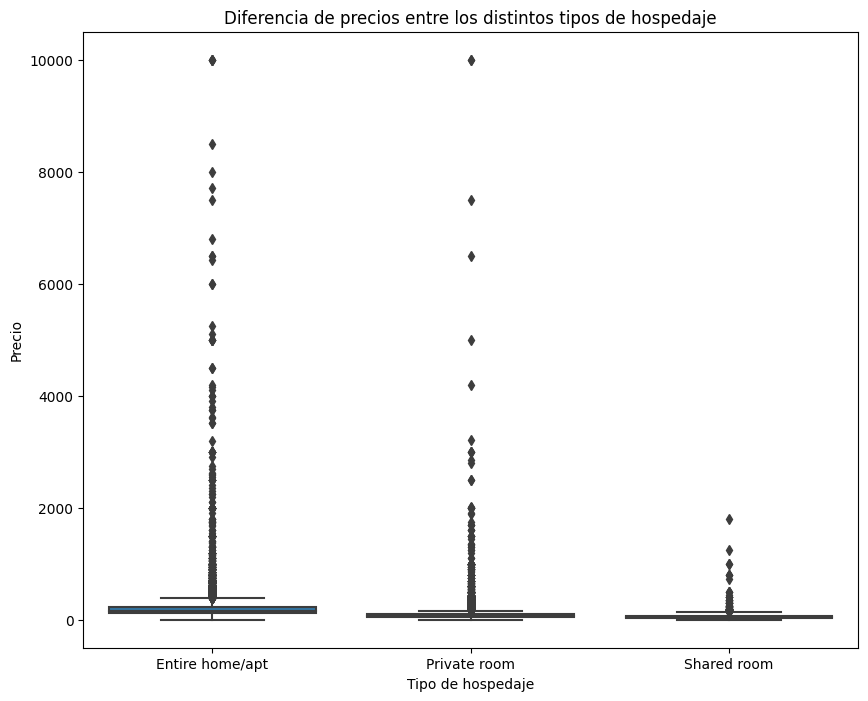

In [97]:
# Trasponer el DataFrame para que cada columna sea un tipo de hospedaje
df4 = df1
df_t = df4.pivot(columns='room_type', values='price')

# Trazar el diagrama de caja utilizando el método boxplot de Seaborn
plt.figure(figsize=(10,8))
sns.boxplot(data=df_t)
plt.title('Diferencia de precios entre los distintos tipos de hospedaje')
plt.xlabel('Tipo de hospedaje')
plt.ylabel('Precio')
plt.show()

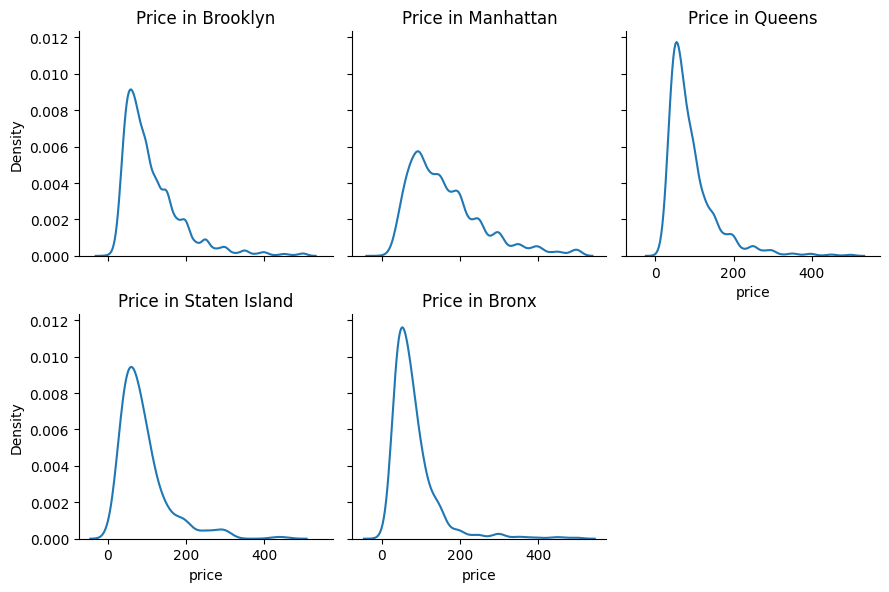

<Figure size 2000x1000 with 0 Axes>

In [98]:
# Filtrar el marco de datos original para incluir solo filas donde el precio sea menor o igual a 500
df_filtered = df1[df1['price'] <= 500]

# Creamos un nuevo dataframe con neighborhood group y price columns usando los datos filtrados
df3 = pd.DataFrame({'neighbourhood_group': df_filtered['neighbourhood_group'], 'price': df_filtered['price']})

# Creamos un FacetGrid con KDE plots para cada neighborhood group
g = sns.FacetGrid(df3, col='neighbourhood_group', col_wrap=3)
g.map(sns.kdeplot, 'price')

# Establecer títulos para cada KDE plot
for ax, title in zip(g.axes.flat, df3['neighbourhood_group'].unique()):
    ax.set_title(f"Price in {title}")
plt.figure(figsize=(20,10))
plt.show()

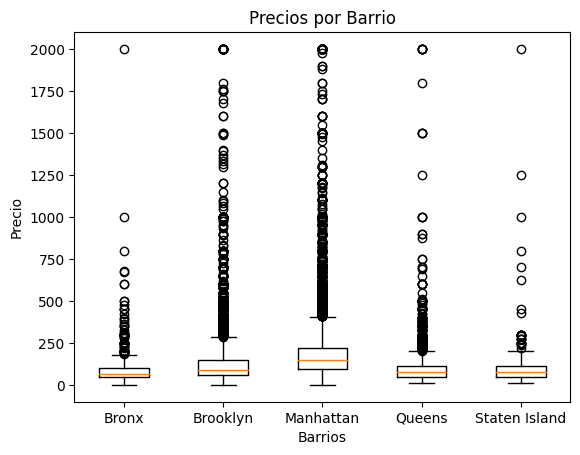

In [99]:
# Lee los datos del archivo CSV
df5 = df1

# Acota el precio máximo a 2000
df5['price'] = df5['price'].clip(upper=2000)

# Agrupa los datos por neighbourhood_group
grouped = df5.groupby('neighbourhood_group')

# Crea un nuevo dataframe solo con los precios y el neighbourhood_group
prices_by_neighbourhood = grouped['price'].apply(list).reset_index()

# Crea el gráfico de caja bigote para cada grupo de neighbourhood_group
fig, ax = plt.subplots()
ax.boxplot(prices_by_neighbourhood['price'])
ax.set_xticklabels(prices_by_neighbourhood['neighbourhood_group'])
ax.set_xlabel('Barrios')
ax.set_ylabel('Precio')
ax.set_title('Precios por Barrio')
plt.show()


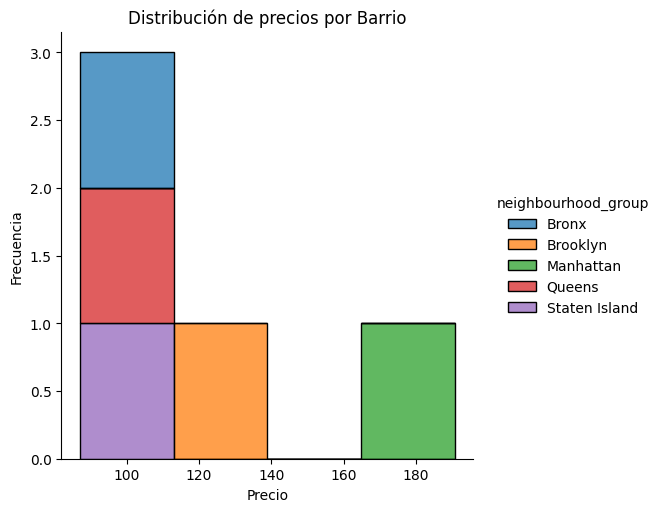

In [100]:
# Agrupa los datos por neighbourhood_group
grouped = df1.groupby('neighbourhood_group')

# Crea un nuevo dataframe solo con los precios y el neighbourhood_group
prices_by_neighbourhood = grouped['price'].mean().reset_index()

# Crea el histograma para cada grupo de neighbourhood_group
sns.displot(prices_by_neighbourhood, x="price", hue="neighbourhood_group", multiple="stack")

# Configura los títulos de los ejes y del gráfico
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios por Barrio')
plt.show()

# ¿ Qué tipo de hospedaje es el más reservado por los usuarios ?

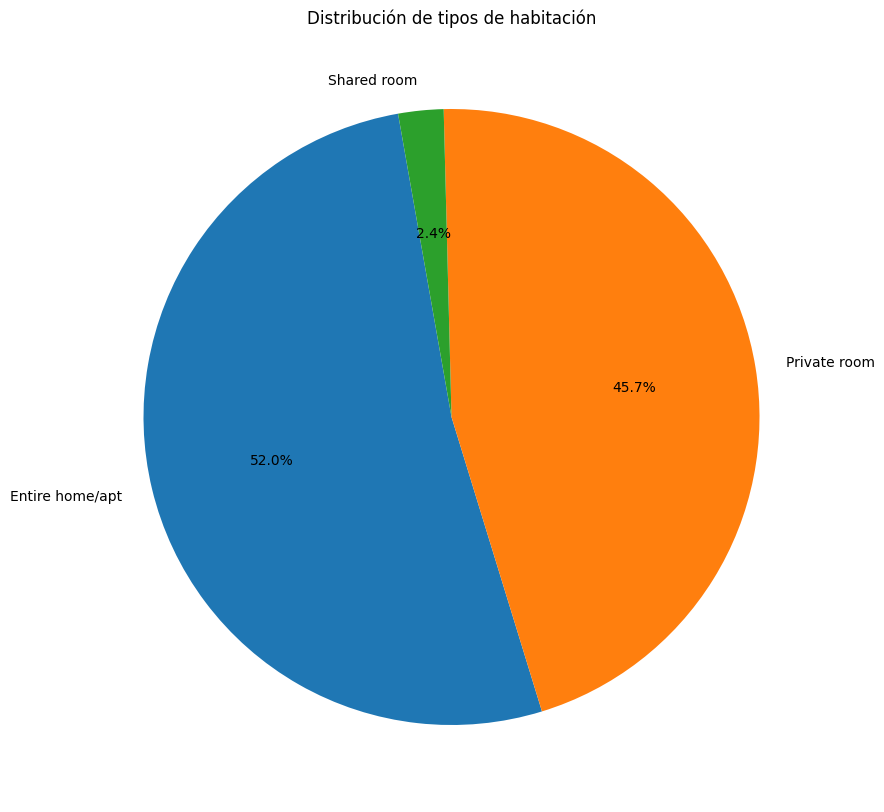

In [101]:
room_types = df1['room_type'].value_counts()

fig, ax = plt.subplots(figsize=(15,10))
ax.pie(room_types.values, labels=room_types.index, autopct='%1.1f%%', startangle=100)
ax.set_title("Distribución de tipos de habitación")
plt.show()

De este gráfico de torta podemos ver que es muy poco provable que la gente que renta lugares en New York, por medio de la aplicación, lo hace en habitaciones compartidas.

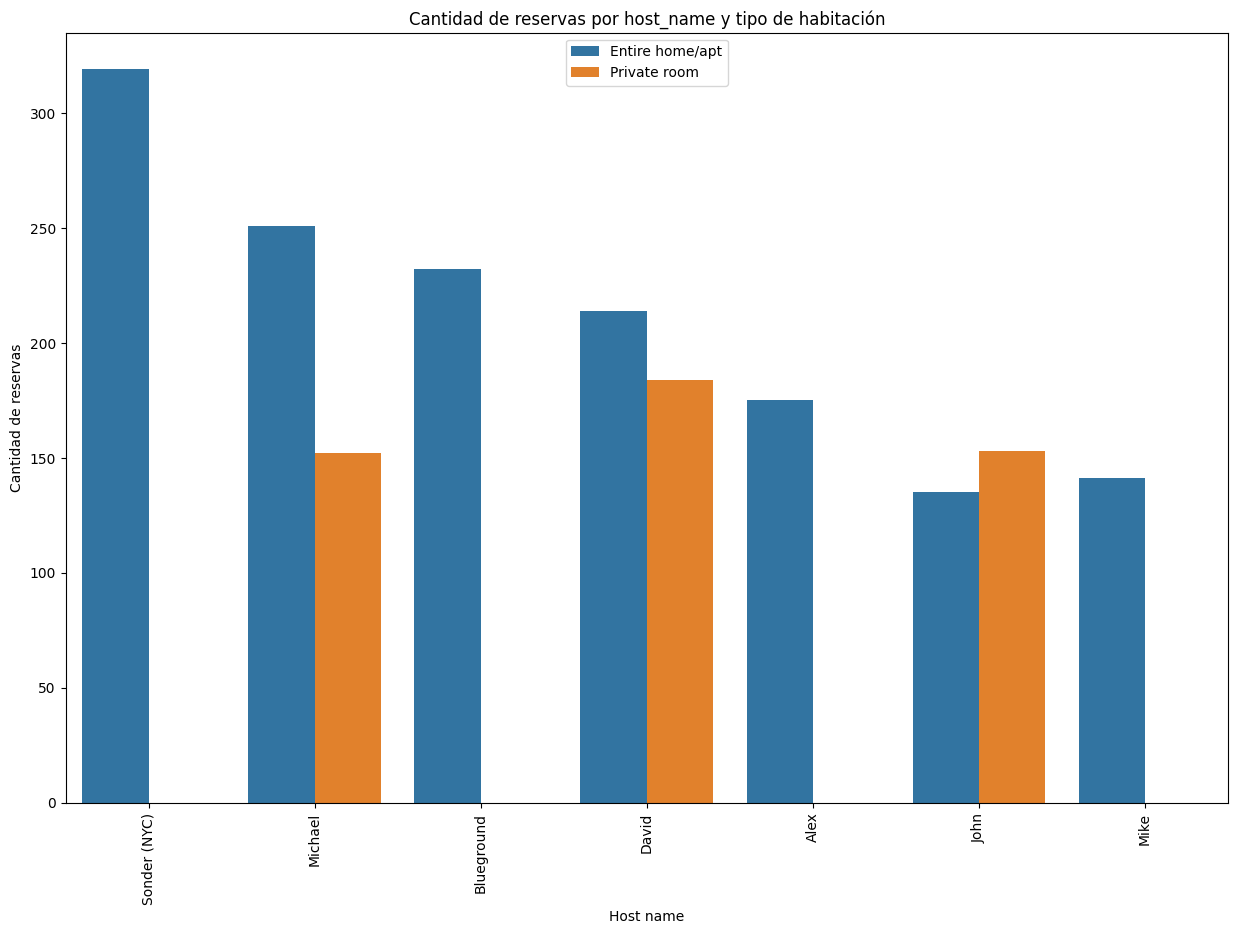

In [102]:
grouped = df1.groupby(['host_name', 'room_type']).count().reset_index()
grouped = grouped[['host_name', 'room_type', 'id']].sort_values(by='id', ascending=False)
grouped = grouped.head(10)

plt.figure(figsize=(15,10))
sns.barplot(x='host_name', y='id', hue='room_type', data=grouped)
plt.title("Cantidad de reservas por host_name y tipo de habitación")
plt.xlabel('Host name')
plt.ylabel('Cantidad de reservas')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Se puede deducir que de la cantidad de reservas por tipo de habitación, dentro de los 7 anfitriones que brindan servicios mediante la aplicación en la plataforma lo hace en Entire home y Private room.


---
# Análisis de datos
---

# Elegir método para reducir la dimensionalidad del Data Set

In [103]:
import warnings
warnings.filterwarnings("ignore")

# manejo de data
import pandas as pd
#pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format

# visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns


# Procesamiento y Selección de variables


Con el fin de correr nuestro primer modelo, sólo seleccionaremos en una primera instancia las variables numéricas y la variable objetivo.

Nota: Luego de darse el módulo de ingeniería de variables se ondará en métodos e ideas para la selección de variables y se incluirán las categóricas.

In [104]:
df6 = df1
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647,-73.972,Private room,149,1,9,2018-10-19,0.210,6,365,2018.000
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.754,-73.984,Entire home/apt,225,1,45,2019-05-21,0.380,2,355,2019.000
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809,-73.942,Private room,150,3,0,NaT,NaN,1,365,NaN
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685,-73.960,Entire home/apt,89,1,270,2019-07-05,4.640,1,194,2019.000
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.799,-73.944,Entire home/apt,80,10,9,2018-11-19,0.100,1,0,2018.000


In [105]:
# vemos que son 48895 registros y 17 columnas
df6.shape

(48895, 17)

In [106]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [107]:
df_num = df6.select_dtypes('number') # datos númericos
df_num['room_type'] = df['room_type']
df_num.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,room_type
0,2539,2787,40.647,-73.972,149,1,9,0.210,6,365,2018.000,Private room
1,2595,2845,40.754,-73.984,225,1,45,0.380,2,355,2019.000,Entire home/apt
2,3647,4632,40.809,-73.942,150,3,0,NaN,1,365,NaN,Private room
3,3831,4869,40.685,-73.960,89,1,270,4.640,1,194,2019.000,Entire home/apt
4,5022,7192,40.799,-73.944,80,10,9,0.100,1,0,2018.000,Entire home/apt


In [108]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'year'],
      dtype='object')

# Valores duplicados

Para poder manejar mejor la información suministrada, eliminaremos los valores que se encuentren duplicados en el Data Set

In [109]:
df_num.drop_duplicates(inplace=True) #df_num = df_num.drop_duplicates()
len(df_num)

48895

# Análisis y procesamiento de la variable price

In [110]:
# cantidad de valores unicos que tiene price
df_num.price.nunique()

625

In [111]:
# valores únicos que tiene price
df_num.price.unique()

array([ 149,  225,  150,   89,   80,  200,   60,   79,  135,   85,  120,
        140,  215,   99,  190,  299,  130,  110,   44,  180,   50,   52,
         55,   70,   35,   40,   68,  115,  151,  228,  144,   69,   49,
        375,  250,  275,  230,   51,   65,  105,   95,  145,  285,   94,
        800,  131,   98,  100,  125,  175,  500,  101,  220,   59,  350,
        199,  325,  235,  170,  400,   75,   90,  185,   77,   76,  160,
        195,  156,  219,  475,  165,  196,   83,  123,  265,  249,  121,
         45,   71,   64,  159,  189,  239,  305,  155,   92,   36,   37,
        205,   39,  390,  129,  212,  124,  122,  109,  575,  229,  169,
        113,  179,  349,  139,  650,   67,  599,  211,  290,   87,  395,
        260,   97,  132,  141,  495,  259,   96,  295,  451,  300,   42,
        255,   72,   88,  450,  198,   46,   33,  106,   91, 2000,  429,
        107,   43,  248,   41,  157,  172,  146,  116,  288,  270,  241,
        399,  438,  279,  137,  280,  226,  154,  7

In [112]:
# conteo de registros por cada valor para price
df_num.price.value_counts()

100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
573        1
766        1
497        1
1066       1
338        1
Name: price, Length: 625, dtype: int64

Transformaciones de columnas en Python

La tranformamos en una variable booleana que valga 1 si price es 250 o mayor y 0 sino.

Para ello aprovechamos para analizar diferentes maneras de transformar columnas.

Con el método iloc se pueden seleccionar los elementos en base a su ubicación. (iloc:=index location)

Con el método loc se pueden seleccionar filas o columnas en base a una etiqueta o seleccionar filas o columnas en base a una condición.

In [113]:
df_numcp = df_num.copy()
df_numcp['precio'] = 1
df_numcp.loc[df_numcp.price > 250, 'precio'] = 0


df_numcp['precio'].unique()

array([1, 0])

Este código crea una nueva columna llamada 'precio' con un valor predeterminado de 1. Luego, utiliza .loc() para asignar el valor de 1 a las filas donde el precio es mayor a 250. Las filas donde el precio es menor o igual a 250 conservan el valor predeterminado de 0.

In [114]:
df_numcp.precio.value_counts()

1    43687
0     5208
Name: precio, dtype: int64

<Axes: xlabel='precio', ylabel='count'>

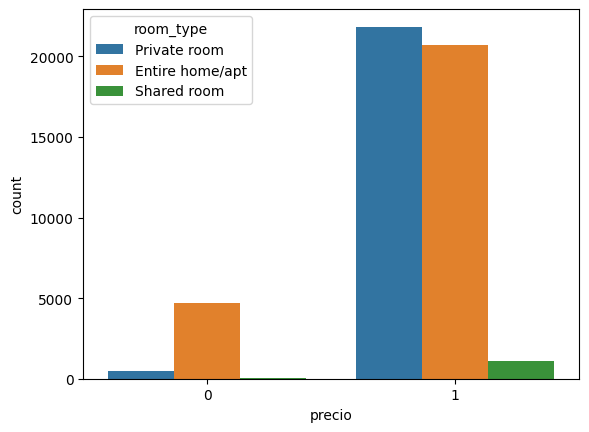

In [115]:
sns.countplot(x='precio', data = df_numcp, hue = 'room_type')

In [116]:
df_numcp.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

price count   48895.000
mean      148.762
std       159.921
min         0.000
25%        69.000
50%       106.000
75%       175.000
max      2000.000
Name: price, dtype: float64


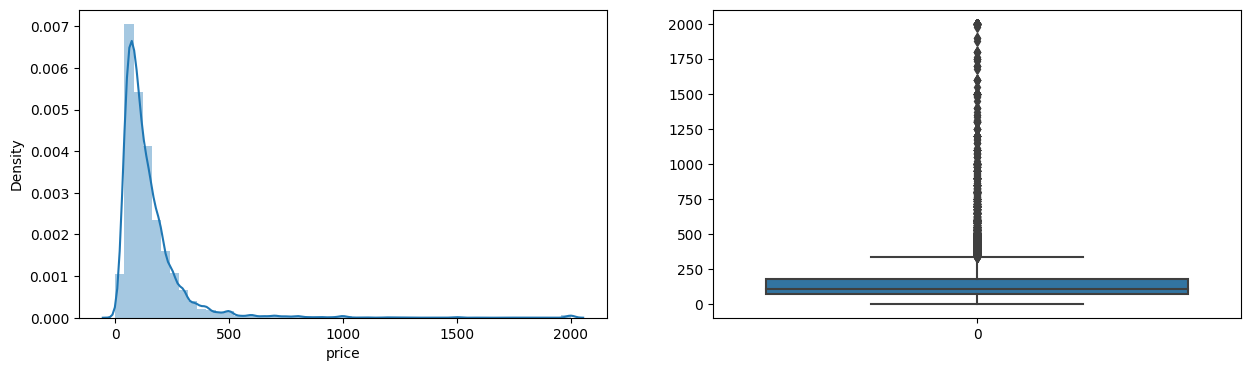

minimum_nights count   48895.000
mean        7.030
std        20.511
min         1.000
25%         1.000
50%         3.000
75%         5.000
max      1250.000
Name: minimum_nights, dtype: float64


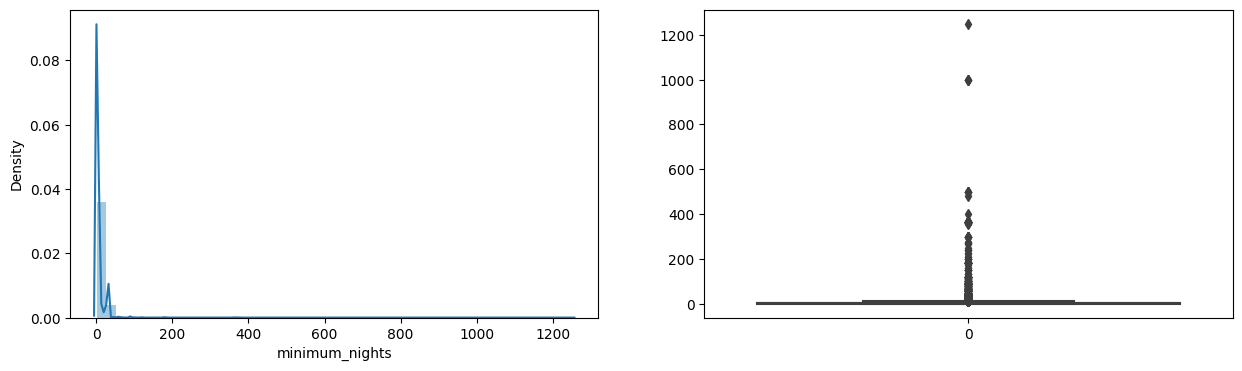

number_of_reviews count   48895.000
mean       23.274
std        44.551
min         0.000
25%         1.000
50%         5.000
75%        24.000
max       629.000
Name: number_of_reviews, dtype: float64


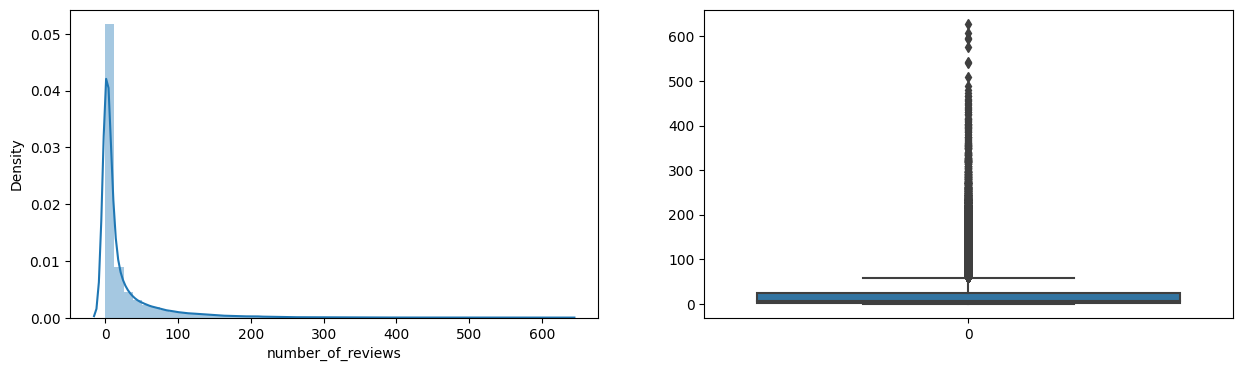

In [117]:
# define descriptive statistics for relevant columns
d_desc = df[['price', 'minimum_nights', 'number_of_reviews']].describe()

# plot distributions and boxplots for each column
for col in ['price', 'minimum_nights', 'number_of_reviews']:
    print(col, d_desc[col])
    fig, ax = plt.subplots(1,2, figsize=(15, 4))
    ax[0] = sns.distplot(df_num[col], ax=ax[0])
    ax[1] = sns.boxplot(df_num[col], ax=ax[1])
    plt.show()

price count   48895.000
mean      148.762
std       159.921
min         0.000
25%        69.000
50%       106.000
75%       175.000
max      2000.000
Name: price, dtype: float64


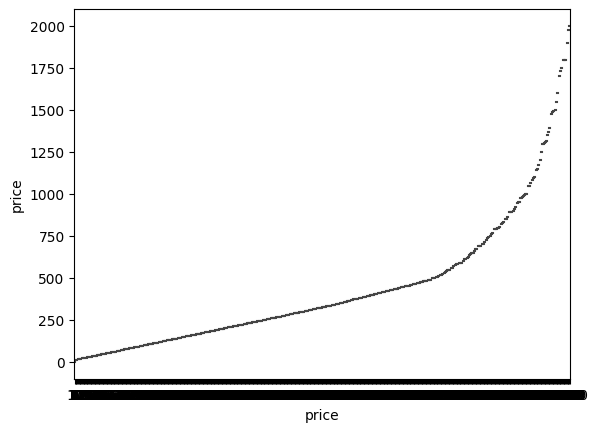

minimum_nights count   48895.000
mean        7.030
std        20.511
min         1.000
25%         1.000
50%         3.000
75%         5.000
max      1250.000
Name: minimum_nights, dtype: float64


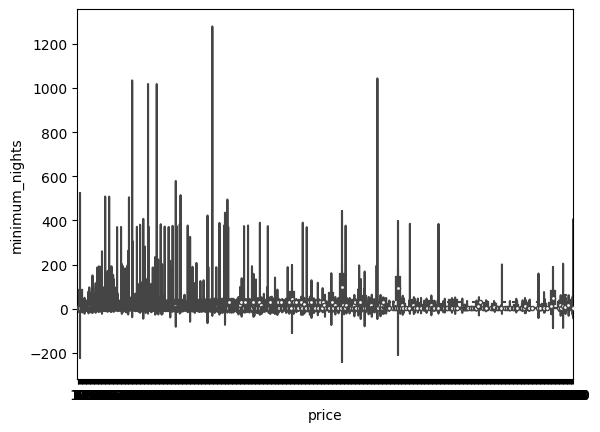

number_of_reviews count   48895.000
mean       23.274
std        44.551
min         0.000
25%         1.000
50%         5.000
75%        24.000
max       629.000
Name: number_of_reviews, dtype: float64


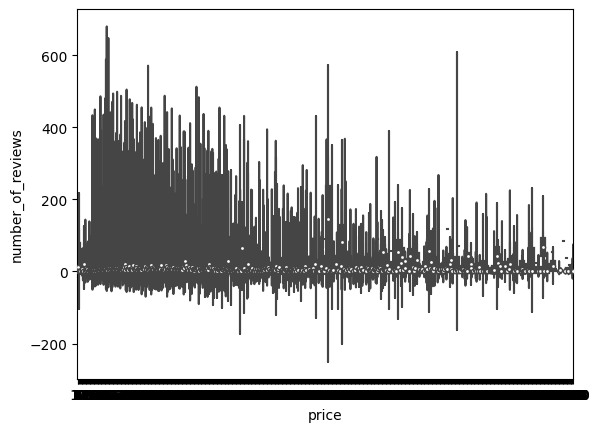

In [118]:
for col in ['price', 'minimum_nights', 'number_of_reviews']:
    print(col, d_desc[col])
    sns.violinplot(x='price', y=col, data=df_num)
    plt.show()

In [119]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3-Q1

tope = Q3+1.5*IQR
tope

334.0

Tomamos la dicisión de procesar los valores outliers de price reemplazandolo por el valor tope del criterio intercuartil:

In [120]:
# creamos una nueva columas con valores reemplazados:
df_num['price_proc'] = df_num['price']
df_num.loc[df_num['price_proc']>tope, 'price_proc'] = tope

# Target numérico:


In [121]:
df_num.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [122]:
## Convertimos la variable target a valores enteros
df_num['room_type'] = df_num.room_type.map({'Private room':0, 'Entire home/apt':1, 'Shared room':2})

In [123]:
df_num.room_type.unique()

array([0, 1, 2])

#Inputs del modelo:

In [124]:
df_num.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,room_type,price_proc
0,2539,2787,40.647,-73.972,149,1,9,0.210,6,365,2018.000,0,149
1,2595,2845,40.754,-73.984,225,1,45,0.380,2,355,2019.000,1,225
2,3647,4632,40.809,-73.942,150,3,0,NaN,1,365,NaN,0,150
3,3831,4869,40.685,-73.960,89,1,270,4.640,1,194,2019.000,1,89
4,5022,7192,40.799,-73.944,80,10,9,0.100,1,0,2018.000,1,80


# Evaluación de Datos

**Evaluación de datos faltantes**

Los valores que faltan se convierten al valor predeterminado de Python. Utilizamos las funciones integradas de Python para identificar estos valores faltantes. Existen dos métodos para detectar datos faltantes:

1.   .isnull()
2.   .notnull()

El resultado es un valor booleano que indica si al valor que se pasa al argumento le faltan datos.




In [125]:
missing_data = df_num.isnull()
missing_data.head(5)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,room_type,price_proc
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


"True" significa valor faltante, mientras que "False" significa valor no faltante.

Contar los valores que faltan en cada columna

Usando un bucle for en Python, podemos calcular rápidamente el número de valores que faltan en cada columna. Como se mencionó anteriormente, "True" representa un valor faltante, "False" significa que el valor está presente en el conjunto de datos. En el cuerpo del bucle for, el método ".value_counts()" cuenta el número de valores "True".

In [126]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

id
False    48895
Name: id, dtype: int64

host_id
False    48895
Name: host_id, dtype: int64

latitude
False    48895
Name: latitude, dtype: int64

longitude
False    48895
Name: longitude, dtype: int64

price
False    48895
Name: price, dtype: int64

minimum_nights
False    48895
Name: minimum_nights, dtype: int64

number_of_reviews
False    48895
Name: number_of_reviews, dtype: int64

reviews_per_month
False    38843
True     10052
Name: reviews_per_month, dtype: int64

calculated_host_listings_count
False    48895
Name: calculated_host_listings_count, dtype: int64

availability_365
False    48895
Name: availability_365, dtype: int64

year
False    38843
True     10052
Name: year, dtype: int64

room_type
False    48895
Name: room_type, dtype: int64

price_proc
False    48895
Name: price_proc, dtype: int64



Según el resumen anterior, cada columna tiene 48895 filas de datos, dos columnas que contienen datos faltantes:


1.   "reviews_per_month" : 10052 datos faltantes
2.   "year" : 10052 datos faltantes



**Tratar con los datos que faltan**
¿Cómo lidiar con los datos faltantes?
1.   Eliminar datos
*   a. Suelta toda la fila
*   B. Suelta toda la columna

2.   Reemplazar datos
*   a. sustitúyase por la media
*   b. Sustitúyalo por frecuencia
*   c. reemplazarlo en función de otras funciones

Las columnas enteras deben eliminarse sólo si la mayoría de las entradas de la columna están vacías. En nuestro conjunto de datos, ninguna de las columnas está lo suficientemente vacía como para eliminarse por completo. Tenemos cierta libertad para elegir qué método reemplazar los datos; Sin embargo, algunos métodos pueden parecer más razonables que otros.

Sustitúyase por media:
*   "reviews_per_month" : 10052 datos faltantes
*   "year" : 10052 datos faltantes

Calcular el promedio de la columna

In [131]:
# Reemplazar los datos faltantes por la media en "reviews_per_month"
reviews_mean = df_num["reviews_per_month"].mean()
df_num["reviews_per_month"].fillna(reviews_mean, inplace=True)

# Reemplazar los datos faltantes por la media en "year"
year_mean = df_num["year"].mean()
df_num["year"].fillna(year_mean, inplace=True)


Es importante tener en cuenta que reemplazar los datos faltantes por la media puede ser una buena opción cuando la mayoría de los valores en la columna son similares, pero si la distribución de los datos es sesgada o si hay muchos valores atípicos, puede ser mejor considerar otras opciones, como la mediana o el valor más común.

Reemplacemos "NaN" por el valor medio en la columna "reviews_per_month" y "year"

In [132]:
df_num.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,room_type,price_proc
0,2539,2787,40.647,-73.972,149,1,9,0.210,6,365,2018.000,0,149
1,2595,2845,40.754,-73.984,225,1,45,0.380,2,355,2019.000,1,225
2,3647,4632,40.809,-73.942,150,3,0,1.373,1,365,2018.288,0,150
3,3831,4869,40.685,-73.960,89,1,270,4.640,1,194,2019.000,1,89
4,5022,7192,40.799,-73.944,80,10,9,0.100,1,0,2018.000,1,80


Vamos a enumerar los tipos de datos para cada columna

In [133]:
df_num.dtypes

id                                  int64
host_id                             int64
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
year                              float64
room_type                           int64
price_proc                          int64
dtype: object

Como podemos ver arriba, algunas columnas no son del tipo de datos correcto. Las variables numéricas deben tener el tipo 'float' o 'int', y las variables con cadenas como categorías deben tener el tipo 'object'. Por ejemplo, las variables 'year' son valores numéricos que describen los años, por lo que debemos esperar que sean del tipo 'int'; sin embargo, se muestran como tipo 'float'. Tenemos que convertir los tipos de datos en un formato adecuado para cada columna utilizando el método "astype()".

**Convertir tipos de datos al formato adecuado**

In [134]:
df_num[["year"]] = df_num[["year"]].astype("int64")

**Vamos a enumerar las columnas después de la conversión**

In [137]:
df_num.dtypes

id                                  int64
host_id                             int64
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
year                                int64
room_type                           int64
price_proc                          int64
dtype: object

In [138]:
df_num.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,room_type,price_proc
0,2539,2787,40.647,-73.972,149,1,9,0.210,6,365,2018,0,149
1,2595,2845,40.754,-73.984,225,1,45,0.380,2,355,2019,1,225
2,3647,4632,40.809,-73.942,150,3,0,1.373,1,365,2018,0,150
3,3831,4869,40.685,-73.960,89,1,270,4.640,1,194,2019,1,89
4,5022,7192,40.799,-73.944,80,10,9,0.100,1,0,2018,1,80


Procedemos a verificar que en las columnas "reviews_per_month" y "year", se han completado los valores faltantes. quedando todas las columnas con la misma cantidad de datos

In [141]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  year                            48895 non-null  int64  
 11  room_type                       48895 non-null  int64  
 12  price_proc                      

Si deseamos obtener el promedio del top 10 de la columna "room_type" que tiene la mayor cantidad de "reviews_per_month", se puede hacer lo siguiente:

Promedio del top 10 de la columna room_type con más reviews_per_month: 1.3983786309477255


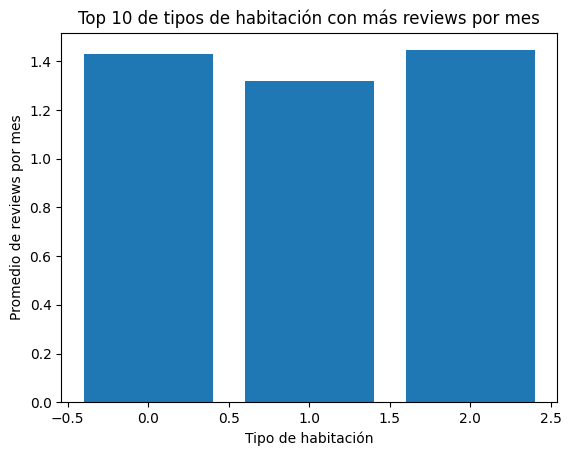

In [147]:
# Ordenar el DataFrame por la columna reviews_per_month de manera descendente
df_sorted = df_num.sort_values(by="reviews_per_month", ascending=False)

# Agrupar por la columna room_type y calcular el promedio de reviews_per_month
reviews_by_room_type = df_sorted.groupby("room_type")["reviews_per_month"].mean()

# Seleccionar los 10 primeros valores en orden descendente
top_10_reviews_by_room_type = reviews_by_room_type.sort_values(ascending=False).head(10)

# Calcular el promedio de los top 10 valores
top_10_mean = top_10_reviews_by_room_type.mean()

# Graficar los valores
bars = ax.bar(top_10_reviews_by_room_type.index, top_10_reviews_by_room_type.values)

# Agregar etiquetas a cada barra
for i, bar in enumerate(bars):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
            top_10_reviews_by_room_type.index[i], ha='center', va='bottom')

print("Promedio del top 10 de la columna room_type con más reviews_per_month:", top_10_mean)

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar los valores
ax.bar(top_10_reviews_by_room_type.index, top_10_reviews_by_room_type.values)

# Configurar las etiquetas de los ejes
ax.set_xlabel("Tipo de habitación")
ax.set_ylabel("Promedio de reviews por mes")
ax.set_title("Top 10 de tipos de habitación con más reviews por mes")

# Mostrar la gráfica
plt.show()


Agregamos las columnas no numericas del dataframe original

In [175]:
object_columns = df1.select_dtypes(include=['object']).columns
print(object_columns)


Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type'],
      dtype='object')


Generamos un nuevo DataFrame con las columnas no numéricas

In [176]:
df_obj = df1.select_dtypes(include='object')

Luego, utilizamos la función merge para combinar los dataframes df_num y df_obj en uno solo.


In [177]:
df_combined = df_num.merge(df_obj, left_index=True, right_index=True)

In [178]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   price                           48895 non-null  int64  
 5   minimum_nights                  48895 non-null  int64  
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  year                            48895 non-null  int64  
 11  room_type_x                     48895 non-null  int64  
 12  price_proc                      

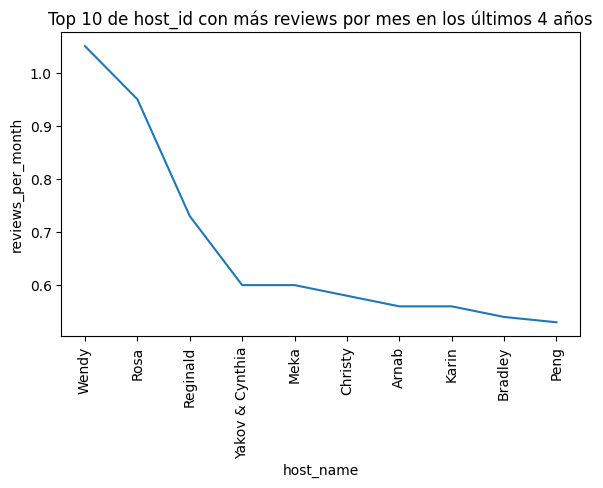

In [201]:
# Obtener las filas del DataFrame correspondientes a los últimos 4 años
df_last_4_years = df_combined[df_combined['year'] <= 2019 - 4]

# Agrupar por host_name y calcular el promedio de reviews_per_month
grouped = df_last_4_years.groupby('host_name').mean()['reviews_per_month']

# Ordenar de mayor a menor y seleccionar los 10 primeros
top_10 = grouped.sort_values(ascending=False).head(10)

# Crear la figura
plt.figure(figsize=(6, 4))

# Graficar los datos
plt.plot(top_10.index, top_10.values)
plt.xlabel('host_name')
plt.ylabel('reviews_per_month')
plt.title('Top 10 de host_id con más reviews por mes en los últimos 4 años')

# Ajustar el gráfico a los datos
plt.tight_layout()

# Rotar las etiquetas del eje x
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()




Este código creará un mapa centrado en la ciudad de Nueva York con un marcador para cada una de las 20 ubicaciones de los host-name con más reviews. Puede hacer clic en cada marcador para ver el nombre del host y el barrio en el que se encuentra.

In [205]:
import folium

top_20 = df.groupby('host_name').mean().sort_values(by='reviews_per_month', ascending=False).head(20)

locations = []
for host_name in top_20.index:
    host_df = df.loc[df['host_name'] == host_name]
    if not host_df.empty:
        lat = host_df['latitude'].iloc[0]
        lon = host_df['longitude'].iloc[0]
        neighbourhood = host_df['neighbourhood'].iloc[0]
        locations.append((host_name, lat, lon, neighbourhood))

# Crear un mapa centrado en la ciudad de Nueva York
mapa = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Agregar un marcador para cada ubicación en la lista locations
for location in locations:
    folium.Marker(location=[location[1], location[2]], tooltip=location[0] + " (" + location[3] + ")").add_to(mapa)

# Mostrar el mapa
mapa


# Conclusiones preeliminares sobre los resultados obtenidos





Del análisis que pudimos hacer al momento podemos ver que al trabajar con los datos obtenidos del df, vamos a poder analizar varios aspectos respecto del mismo, los más importantes a considerar para trabajar serían: el precio, el tipo de lugar al que se puede acceder desde la platraforma, podemos además analizar la información antes mencionada por distrito y a su vez, dentro de cada distrito por el barrio o vecindario... 